In [1]:
from pylab import *
import matplotlib as mpl
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif"
    })

plt.rc('text.latex', preamble=r'\usepackage[T1,T2A]{fontenc}\usepackage[utf8]{inputenc}\usepackage{cmsrb}\usepackage{amsmath}\usepackage[Symbolsmallscale]{upgreek}\usepackage{icomma}')

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

matplotlib.rc('font', **font)


# Decimalni zarez
import locale
locale.setlocale(locale.LC_NUMERIC, "sr_RS.utf8")
plt.rcParams['axes.formatter.use_locale'] = True


def u(t):
    return (t > 0) * 1.0

In [36]:
def generate_canvas(w = 1.6, h =  1.6 / 1.618):
    fig = figure (figsize = (w, h), dpi = 300)
    xlim([-2,2])
    ylim([-2,2])
    minorticks_on()
    grid(visible=True, which='major', color='0.45', linestyle='-')
    grid(visible=True, which='minor', color='0.75', linestyle='--')

    return fig

def plot_dirac(x, A, lw = 1.5, c = 'k'):
    arrow(x, 0, 0, A, shape="full", color=c,linewidth=lw, head_width=1.5, head_length=0.15, length_includes_head=True, zorder=10)
    

In [37]:
def multiple_formatter(denominator=3, number=np.pi, latex=r'\uppi'):
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    def _multiple_formatter(x, pos):
        den = denominator
        num = np.int(np.rint(den*x/number))
        com = gcd(num,den)
        (num,den) = (int(num/com),int(den/com))
        if den==1:
            if num==0:
                return r'$0$'
            if num==1:
                return r'$%s$'%latex
            elif num==-1:
                return r'$-%s$'%latex
            else:
                return r'$%s%s$'%(num,latex)
        else:
            if num==1:
                return r'$\dfrac{%s}{%s}$'%(latex,den)
            elif num==-1:
                return r'$-\dfrac{%s}{%s}$'%(latex,den)
            elif num>1:
                return r'$\dfrac{%s%s}{%s}$'%(num,latex,den)
            elif num<-1:
                return r'$-\dfrac{%s%s}{%s}$'%(abs(num),latex,den)
                
    return _multiple_formatter

class Multiple:
    def __init__(self, denominator=2, number=np.pi, latex=r'\uppi'):
        self.denominator = denominator
        self.number = number
        self.latex = latex

    def locator(self):
        return plt.MultipleLocator(self.number / self.denominator)

    def formatter(self):
        return plt.FuncFormatter(multiple_formatter(self.denominator, self.number, self.latex))

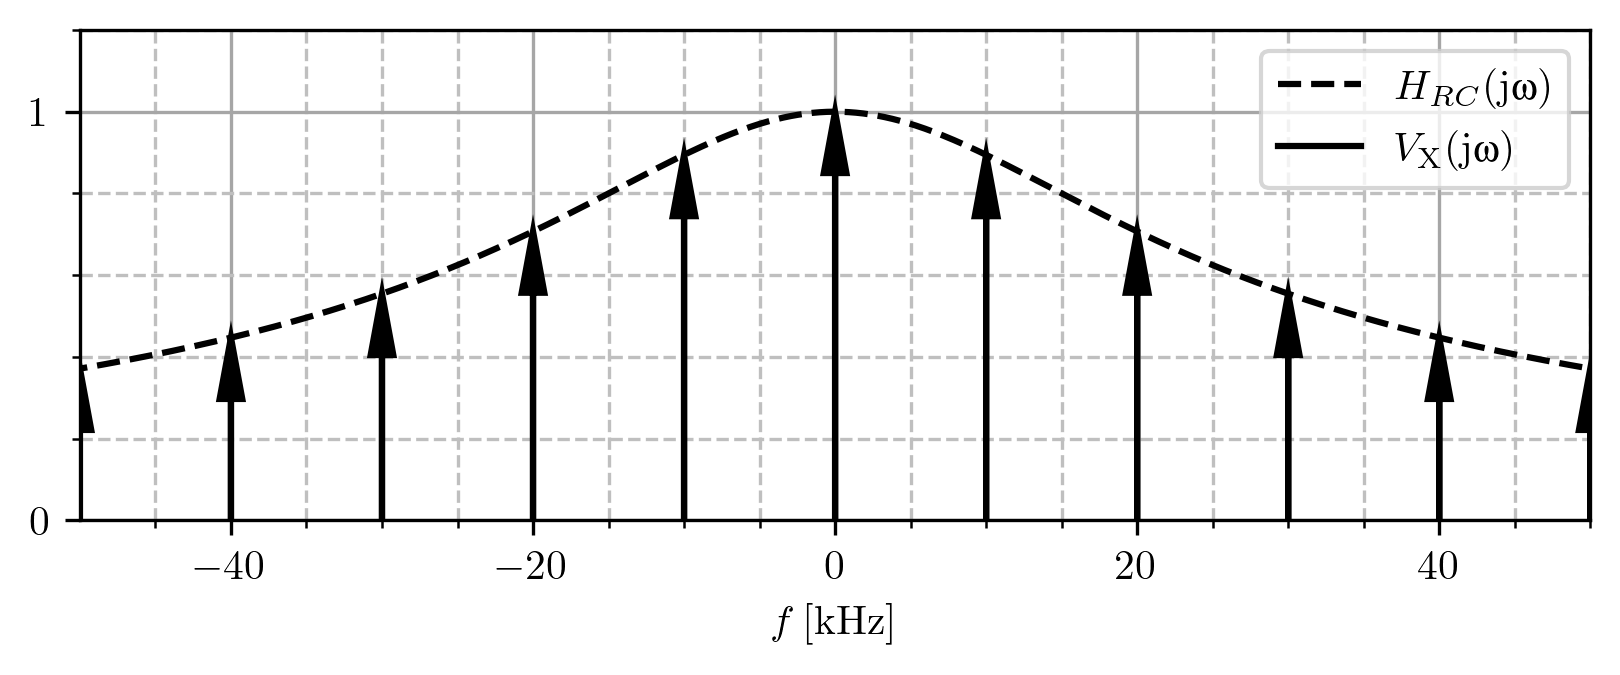

In [74]:
width = 165 / 25.4 # sirina
height = width / 3 

fig = figure (figsize = (width, height), dpi = 300)
ax = fig.gca()
xlim([-50,50])
minorticks_on()
grid(visible=True, which='major', color='0.65', linestyle='-')
grid(visible=True, which='minor', color='0.75', linestyle='--')
yticks([0,1,2,3,4,5]) 

dt_half = 2.5e-9 / 250e-9

t = linspace(-0.5, 0.5, 1000)

y = t * 0 + 2.5
yh = t * 0 + 3.5
yl = t * 0 + 1.5

f = linspace(-60, 60, 1000)
R = 25
C = 1000/pi * 1e-9

def H(f):
    return 1/( sqrt( 1 + (2*pi*f*1e3*R*C)**2 )  )

def p(f):
    if abs(f - 20) < 5: return 1
    return 0

plt.plot(f, H(f), 'k--')
plt.plot( [50,50], [50,50], 'k-' )
for k in range(-5,6):
    plot_dirac(k*10, H(k*10) )

ylim([0, 1.2])

    
xlabel(r"$f\rm\,[kHz]$")
legend([r"$H_{RC}({\rm j}\upomega)$", r"$V_{\rm X}({\rm j}\upomega)$"])

#plt.show()

plt.savefig("comb_snaga_result.pdf", bbox_inches='tight' )
# Slika se dodatno edituje u Inkscapeu

In [ ]:
1/(R*C)